<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs

Create Dataset:

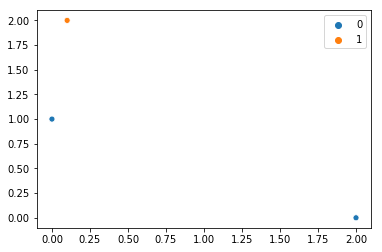

In [2]:
m = NUM_POINTS = 100
n = NUM_FEATURES = 2

CASE = 9

if CASE == 1:
  # 100 Vectors - Few Support Vectors
  X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.5, random_state=0)
elif CASE == 2:
  # 4 Vectors - 1 Non-Support Vector
  X = np.array([[0, 1], [1, 0], [2, 2], [3, 3]])
  y = np.array([0, 0, 1, 1]).reshape((4,))
  m = 4
  n = 2
elif CASE == 3:
  # 4 Vectors - All Support Vectors (But not really)
  X = np.array([[0, 1], [2, 0], [2, 2], [0, 3]])
  y = np.array([0, 0, 1, 1])
  m = 4
  n = 2
elif CASE == 4:
  # 3 Vectors - 1 Non-Support Vector
  X = np.array([[0, 1], [2, 0], [0, 2]])
  y = np.array([0, 0, 1])
  m = 3
  n = 2
elif CASE == 5:
  # 3 Vectors - All Support Vectors
  X = np.array([[0, 1], [2, 0], [2, 2]])
  y = np.array([0, 0, 1]).reshape((3,))
  m = 3
  n = 2
elif CASE == 6:
  # 2 Vectors - All Support Vectors
  X = np.array([[1, 1], [2, 2]])
  y = np.array([0, 1]).reshape((2,))
  m = 2
  n = 2
elif CASE == 7:
  # 4 Vectors - 1 Non-Support Vector
  X = np.array([[0, 1], [1, 0], [2, 2], [3, 3]], dtype=np.float64)
  X += np.array([[0.5, 0.8], [0.5, 0.8], [0.5, 0.8], [0.5, 0.8]])
  y = np.array([0, 0, 1, 1]).reshape((4,))
  m = 4
  n = 2
elif CASE == 8:
  # Steven
  X = np.array([[1, 1], [2, 2], [3, 3]])
  y = np.array([0, 0, 1])
  m = 3
  n = 2
elif CASE == 9:
  # Modified Case 4
  X = np.array([[0, 1], [2, 0], [0.1, 2]])
  y = np.array([0, 0, 1])
  m = 3
  n = 2


sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

y = 2*y - 1  # Change y to be -1 and 1 instead of 0 and 1


Create F array

In [3]:
def kernel(x1, x2, type):
  if type=='no-kernel':
    return np.dot(x1, x2)

F = np.zeros((m+1, m+1))
for i in range(m):
  for j in range(m):
    F[i, j] = y[i]*y[j]*kernel(X[i], X[j], 'no-kernel')

for i in range(m):
  F[m, i] = y[i]
  F[i, m] = y[i]

F[m, m] = 0
  
print(f'F=\n{F}\n')

B = np.ones(m+1)
B[m] = 0

print(f'B=\n{B}')

F=
[[ 1.    0.   -2.   -1.  ]
 [ 0.    4.   -0.2  -1.  ]
 [-2.   -0.2   4.01  1.  ]
 [-1.   -1.    1.    0.  ]]

B=
[1. 1. 1. 0.]


Solve System

In [7]:
'''

X_temp = np.copy(X)
y_temp = np.copy(y)
sol_found = False

while not sol_found:
  lambdas = np.linalg.lstsq(F, np.ones(F.shape[0]))
  lambdas = np.maximum(lambdas, 0)
  remove = (lambdas == 0)
  keep = (lambdas != 0)
  if len(remove) == 0:
    sol_found = True
  else:
    F = F[keep]
    F = F[:, keep]
    X_temp = X_temp[keep]
    y_temp = y_temp[keep]
    print(y_temp.shape)
'''

lambdas = np.linalg.solve(F, B)
#temp = lambdas[-1]
#lambdas = np.maximum(lambdas, 0)
#lambdas[-1] = temp
print(lambdas)

#keep = [True, True, True, False, True]
#F = F[keep]
#F = F[:, keep]
#lambdas = np.linalg.solve(F, B[keep])
#print(lambdas)

[ 2.63038549 -0.36281179  2.2675737  -2.9047619 ]


Calculate Weights and Bias

In [5]:
W = np.zeros(n)
for i in range(m):
  W += lambdas[i]*y[i]*X[i]

b = lambdas[m]

print(W)
print(b)

[0.22675737 1.9047619 ]
-2.9047619047619047


Graph Decision Boundary

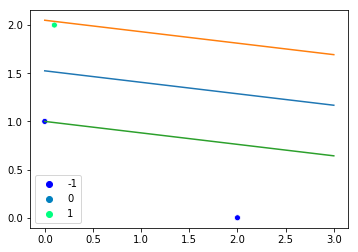

In [6]:
if W[1] != 0:
  x_plot = np.linspace(0, 3, 100)
  y_plot = (-W[0]*x_plot - b)/W[1]
  y_plot_2 = (1-W[0]*x_plot - b)/W[1]
  y_plot_3 = (-1-W[0]*x_plot - b)/W[1]
else:
  y_plot = np.linspace(0, 3, 100)
  x_plot = np.array([- b/W[0]]*100).reshape(100,)

fig, ax = plt.subplots()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax, palette='winter')
ax.plot(x_plot, y_plot)
ax.plot(x_plot, y_plot_2)
ax.plot(x_plot, y_plot_3)
ax.set_aspect(1.0)
plt.show()